In [72]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2022`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()




In [73]:
df1.shape

(767953, 24)

In [74]:
df1.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'rate_code', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'ehail_fee', 'airport_fee', 'total_amount', 'payment_type',
       'distance_between_service', 'time_between_service', 'trip_type',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month'],
      dtype='object')

In [75]:
df1.dtypes

vendor_id                                object
pickup_datetime             datetime64[ns, UTC]
dropoff_datetime            datetime64[ns, UTC]
store_and_fwd_flag                       object
rate_code                                object
passenger_count                           Int64
trip_distance                            object
fare_amount                              object
extra                                    object
mta_tax                                  object
tip_amount                               object
tolls_amount                             object
ehail_fee                                object
airport_fee                              object
total_amount                             object
payment_type                             object
distance_between_service                 object
time_between_service                      Int64
trip_type                                object
imp_surcharge                            object
pickup_location_id                      

In [76]:
df1.passenger_count.isna().sum()

83265

In [77]:
df1.dropna(subset=['passenger_count'], inplace=True)


In [78]:
df1 = df1[df1['passenger_count'] != 0]

In [79]:
df1.passenger_count.unique()

<IntegerArray>
[1, 2, 5, 3, 4, 6, 8, 9, 7]
Length: 9, dtype: Int64

In [80]:
df1 = df1[df1['passenger_count'] != 32]

In [81]:
df1 = df1[df1['passenger_count'] != 48]

In [82]:
df1.passenger_count.unique()

<IntegerArray>
[1, 2, 5, 3, 4, 6, 8, 9, 7]
Length: 9, dtype: Int64

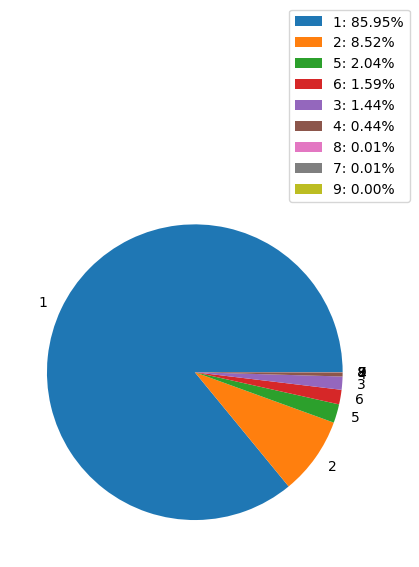

<Figure size 800x800 with 0 Axes>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data


# Get value counts for the column
value_counts = df1['passenger_count'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(value_counts, labels=value_counts.index)
plt.figure(figsize=(8, 8))

# Add percentage values to legend
total = sum(value_counts)
vals = value_counts.values
labels = value_counts.index
percentages = ["{0:.2f}%".format(val/total*100) for val in vals]
legends = [f'{label}: {percentage}' for label, percentage in zip(labels, percentages)]
ax.legend(legends, loc="upper right",bbox_to_anchor=(1.1, 1.5))
plt.savefig('11.png', dpi=300, bbox_inches='tight')

plt.show()

In [84]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2022`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [85]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
zone = query_job.to_dataframe()


In [86]:
new_df = pd.DataFrame({
    'Pick-up': df1['pickup_location_id'],
    'Drop-off': df1['dropoff_location_id']
})
new_df

,Pick-up,Drop-off
0,93,93
1,247,247
2,7,193
3,193,193
4,93,93
...,...,...
767948,116,239
767949,244,262
767950,75,264
767951,226,137


In [87]:
zone['zone_id'].max()

'99'

In [88]:
zone['zone_name_borough'] = zone['zone_name'] + '-' + zone['borough']

# display merged dataframe
print(zone)

    zone_id                  zone_name        borough  \
0         1             Newark Airport            EWR   
1         3    Allerton/Pelham Gardens          Bronx   
2        18               Bedford Park          Bronx   
3        20                    Belmont          Bronx   
4        31                 Bronx Park          Bronx   
..      ...                        ...            ...   
258     206  Saint George/New Brighton  Staten Island   
259     214   South Beach/Dongan Hills  Staten Island   
260     221                  Stapleton  Staten Island   
261     245              West Brighton  Staten Island   
262     251                Westerleigh  Staten Island   

                                             zone_geom  \
0    POLYGON((-74.1856319999999 40.6916479999999, -...   
1    POLYGON((-73.848596761 40.8716707849999, -73.8...   
2    POLYGON((-73.8844286139999 40.8668003789999, -...   
3    POLYGON((-73.8839239579998 40.8644177609999, -...   
4    POLYGON((-73.8710017

In [89]:
zone.columns

Index(['zone_id', 'zone_name', 'borough', 'zone_geom', 'zone_name_borough'], dtype='object')

In [90]:
zone = zone.drop(columns=['zone_name', 'borough', 'zone_geom'])

In [91]:
zone.head()

,zone_id,zone_name_borough
0,1,Newark Airport-EWR
1,3,Allerton/Pelham Gardens-Bronx
2,18,Bedford Park-Bronx
3,20,Belmont-Bronx
4,31,Bronx Park-Bronx


In [92]:
'''merged_df = pd.merge(new_df, zone, how='left', left_on='Pick-up', right_on='zone_id')
merged_df = pd.merge(merged_df, zone, how='left', left_on='Drop-off', right_on='zone_id')

# keep only the desired columns
merged_df = merged_df[['Pick-up', 'Drop-off', 'zone_name_borough', 'zone_name_borough_y']]

# rename the columns
merged_df.columns = ['Pick-up', 'Drop-off', 'pickup_location', 'dropoff_location']

# show the resulting dataframe
print(merged_df.head())'''

"merged_df = pd.merge(new_df, zone, how='left', left_on='Pick-up', right_on='zone_id')\nmerged_df = pd.merge(merged_df, zone, how='left', left_on='Drop-off', right_on='zone_id')\n\n# keep only the desired columns\nmerged_df = merged_df[['Pick-up', 'Drop-off', 'zone_name_borough', 'zone_name_borough_y']]\n\n# rename the columns\nmerged_df.columns = ['Pick-up', 'Drop-off', 'pickup_location', 'dropoff_location']\n\n# show the resulting dataframe\nprint(merged_df.head())"

In [93]:
merged_df = pd.merge(new_df, zone, how='left', left_on='Pick-up', right_on='zone_id')


In [94]:
merged_df

,Pick-up,Drop-off,zone_id,zone_name_borough
0,93,93,93,Flushing Meadows-Corona Park-Queens
1,247,247,247,West Concourse-Bronx
2,7,193,7,Astoria-Queens
3,193,193,193,Queensbridge/Ravenswood-Queens
4,93,93,93,Flushing Meadows-Corona Park-Queens
...,...,...,...,...
768775,116,239,116,Hamilton Heights-Manhattan
768776,244,262,244,Washington Heights South-Manhattan
768777,75,264,75,East Harlem South-Manhattan
768778,226,137,226,Sunnyside-Queens


In [95]:
merged_df = pd.merge(merged_df, zone, how='left', left_on='Drop-off', right_on='zone_id')

In [96]:
merged_df = merged_df.drop(columns=['zone_id_x', 'zone_id_y'])

In [97]:
new_names = {'zone_name_borough_x': 'Pick-up_location', 'zone_name_borough_y': 'Drop-off_location'}
location = merged_df.rename(columns=new_names)

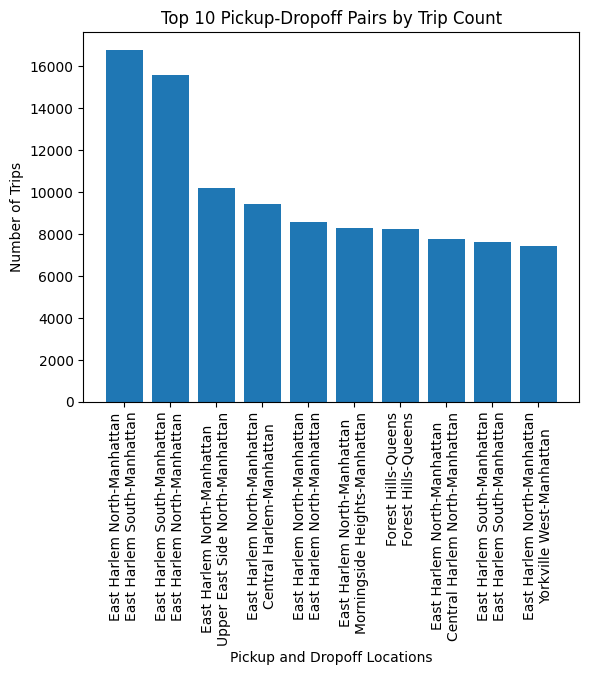

In [98]:
trip_counts = location.groupby(['Pick-up_location', 'Drop-off_location']).size().reset_index(name='count')

# Sort the trip counts in descending order
trip_counts = trip_counts.sort_values(by='count', ascending=False)

# Plot a bar chart of the top 10 pickup-dropoff pairs by trip count
top_pairs = trip_counts.head(10)
plt.bar(range(len(top_pairs)), top_pairs['count'])
plt.xticks(range(len(top_pairs)), [f"{pickup}\n{dropoff}" for pickup, dropoff in zip(top_pairs['Pick-up_location'], top_pairs['Drop-off_location'])])
plt.xlabel('Pickup and Dropoff Locations')
plt.ylabel('Number of Trips')
plt.title('Top 10 Pickup-Dropoff Pairs by Trip Count')
plt.xticks(rotation=90)
plt.savefig('22.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
df1.time_between_service.isna()

0         True
1         True
2         True
3         True
4         True
          ... 
767948    True
767949    True
767950    True
767951    True
767952    True
Name: time_between_service, Length: 767953, dtype: bool

In [100]:
df1.trip_type.unique()

array(['2.0', '1.0', None], dtype=object)

In [101]:
df1.trip_type.nunique()

2

In [102]:
df1.fare_amount.min()

Decimal('-350.080000000')

In [103]:
df1.total_amount.min()

Decimal('-350.380000000')

In [104]:
df1.total_amount.max()

Decimal('2021.000000000')

In [105]:
df1.fare_amount.min()

Decimal('-350.080000000')

In [106]:
df1.passenger_count.min()

0

In [107]:
df1 = df1[df1['passenger_count'] != 0]

In [108]:
df1.passenger_count.unique()

<IntegerArray>
[1, 2, 5, 3, 4, 6, 8, 9, 7]
Length: 9, dtype: Int64

In [109]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum', 'passenger_count': 'sum'})

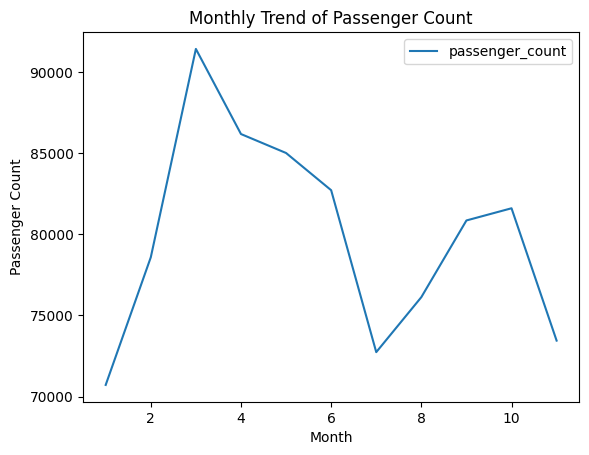

In [110]:
monthly_stats.plot(kind='line', y='passenger_count',legend=True)

plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Monthly Trend of Passenger Count')
plt.savefig('33.png', dpi=300, bbox_inches='tight')
plt.show()

In [111]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2022`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [112]:
df1 = df1[df1['total_amount'] >= 0]


In [113]:
df1 = df1[df1['total_amount'] != 0E-9]

In [114]:
df1 = df1[df1['total_amount'] >= 1]

In [115]:
df1.total_amount.mean()

19.270617461428284

In [116]:
df1.data_file_month.unique()

<IntegerArray>
[9, 11, 10, 1, 2, 3, 4, 5, 6, 7, 8]
Length: 11, dtype: Int64

In [117]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum'})

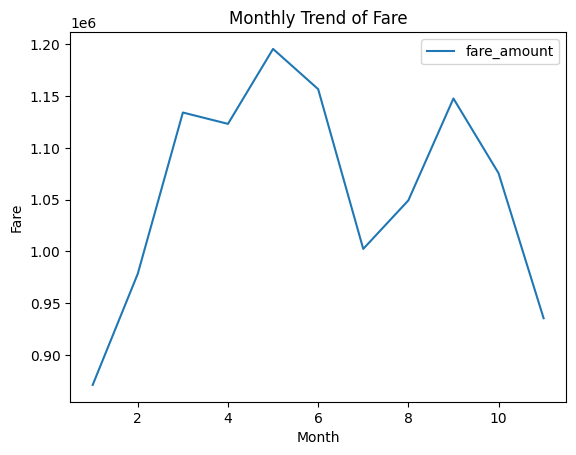

In [118]:
monthly_stats['fare_amount'] = pd.to_numeric(monthly_stats['fare_amount'], errors='coerce')
monthly_stats.plot(kind='line', y='fare_amount', legend=True)

plt.xlabel('Month')
plt.ylabel('Fare')
plt.title('Monthly Trend of Fare')
plt.savefig('44.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2022`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [120]:
df1.pickup_datetime

0        2022-09-01 01:23:37+00:00
1        2022-09-01 04:55:25+00:00
2        2022-09-01 07:13:21+00:00
3        2022-09-01 13:31:05+00:00
4        2022-09-01 16:53:04+00:00
                    ...           
767948   2022-08-13 15:43:30+00:00
767949   2022-08-08 14:40:05+00:00
767950   2022-08-12 10:07:53+00:00
767951   2022-08-14 17:45:32+00:00
767952   2022-08-17 13:55:33+00:00
Name: pickup_datetime, Length: 767953, dtype: datetime64[ns, UTC]

In [121]:
import pandas as pd
from datetime import datetime

# Load the data into a pandas DataFrame
#df1 = pd.read_csv('your_file.csv')

# Convert the pickup_datetime column to a datetime object
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])

# Extract the pickup time as a separate column
df1['pickup_time'] = df1['pickup_datetime'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))

# Print the first few rows to verify the results
print(df1.head())

  vendor_id           pickup_datetime          dropoff_datetime  \
0         1 2022-09-01 01:23:37+00:00 2022-09-01 01:24:08+00:00   
1         1 2022-09-01 04:55:25+00:00 2022-09-01 04:55:33+00:00   
2         2 2022-09-01 07:13:21+00:00 2022-09-01 07:14:15+00:00   
3         2 2022-09-01 13:31:05+00:00 2022-09-01 13:31:30+00:00   
4         1 2022-09-01 16:53:04+00:00 2022-09-01 16:53:34+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       5.0                0   0.100000000        0E-9   
1                  N       5.0                1          0E-9        0E-9   
2                  N       1.0                1          0E-9        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       5.0                1   0.100000000        0E-9   

  extra mta_tax  ... payment_type distance_between_service  \
0  0E-9    0E-9  ...          3.0                     None   
1  0E-9   

In [122]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,distance_between_service,time_between_service,trip_type,imp_surcharge,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,pickup_time
0,1,2022-09-01 01:23:37+00:00,2022-09-01 01:24:08+00:00,N,5.0,0,0.100000000,0E-9,0E-9,0E-9,...,3.0,None,<NA>,2.0,0E-9,93,93,2022,9,01:23:37
1,1,2022-09-01 04:55:25+00:00,2022-09-01 04:55:33+00:00,N,5.0,1,0E-9,0E-9,0E-9,0E-9,...,3.0,None,<NA>,2.0,0E-9,247,247,2022,9,04:55:25
2,2,2022-09-01 07:13:21+00:00,2022-09-01 07:14:15+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,7,193,2022,9,07:13:21
3,2,2022-09-01 13:31:05+00:00,2022-09-01 13:31:30+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,193,193,2022,9,13:31:05
4,1,2022-09-01 16:53:04+00:00,2022-09-01 16:53:34+00:00,N,5.0,1,0.100000000,0E-9,0E-9,0E-9,...,3.0,None,<NA>,2.0,0E-9,93,93,2022,9,16:53:04


In [123]:
# Create a new column indicating if pickup_time is at night or during the day
df1['pickup_time_period'] = df1['pickup_datetime'].apply(lambda x: 'night' if ((x.hour >= 20) or (x.hour < 8)) else 'day')

# Print the first few rows to verify the results
print(df1.head())


  vendor_id           pickup_datetime          dropoff_datetime  \
0         1 2022-09-01 01:23:37+00:00 2022-09-01 01:24:08+00:00   
1         1 2022-09-01 04:55:25+00:00 2022-09-01 04:55:33+00:00   
2         2 2022-09-01 07:13:21+00:00 2022-09-01 07:14:15+00:00   
3         2 2022-09-01 13:31:05+00:00 2022-09-01 13:31:30+00:00   
4         1 2022-09-01 16:53:04+00:00 2022-09-01 16:53:34+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       5.0                0   0.100000000        0E-9   
1                  N       5.0                1          0E-9        0E-9   
2                  N       1.0                1          0E-9        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       5.0                1   0.100000000        0E-9   

  extra mta_tax  ... distance_between_service time_between_service trip_type  \
0  0E-9    0E-9  ...                     None         

Average Fare Amount by Pickup Time Period:
pickup_time_period
day      14.856421
night    16.140022
Name: fare_amount, dtype: float64


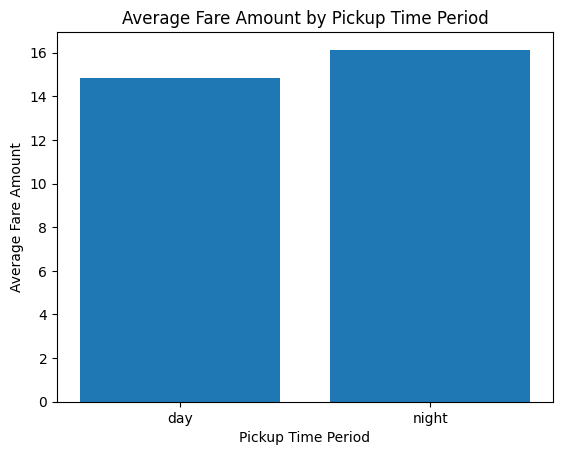

In [124]:
import matplotlib.pyplot as plt

# Calculate the average fare amount by pickup time period
fare_by_time_period = df1.groupby('pickup_time_period')['fare_amount'].mean()

# Print the average fare amount by pickup time period
print("Average Fare Amount by Pickup Time Period:")
print(fare_by_time_period)

# Create a bar plot of average fare amount by pickup time period
plt.bar(fare_by_time_period.index, fare_by_time_period.values)

# Set the plot title and axis labels
plt.title('Average Fare Amount by Pickup Time Period')
plt.xlabel('Pickup Time Period')
plt.ylabel('Average Fare Amount')
plt.savefig('55.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


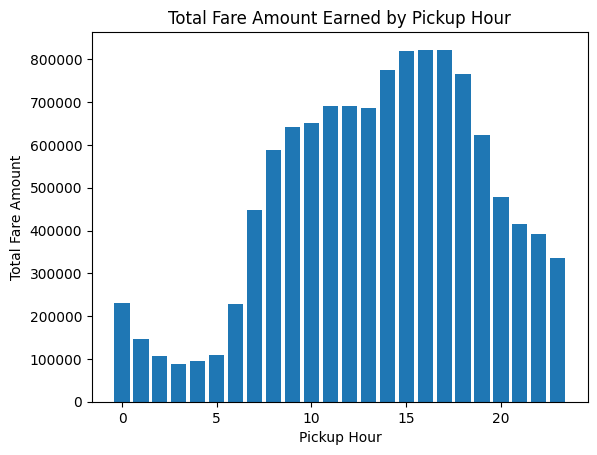

In [125]:
# Create a new column to extract the hour component of pickup_datetime
df1['pickup_hour'] = df1['pickup_datetime'].apply(lambda x: x.hour)

# Calculate the total fare amount earned for each pickup hour
fare_by_hour = df1.groupby('pickup_hour')['fare_amount'].sum()

# Create a bar plot of total fare amount earned by pickup hour
plt.bar(fare_by_hour.index, fare_by_hour.values)

# Set the plot title and axis labels
plt.title('Total Fare Amount Earned by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Fare Amount')

plt.savefig('66.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


In [126]:
df1.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'rate_code', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'ehail_fee', 'airport_fee', 'total_amount', 'payment_type',
       'distance_between_service', 'time_between_service', 'trip_type',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month', 'pickup_time',
       'pickup_time_period', 'pickup_hour'],
      dtype='object')

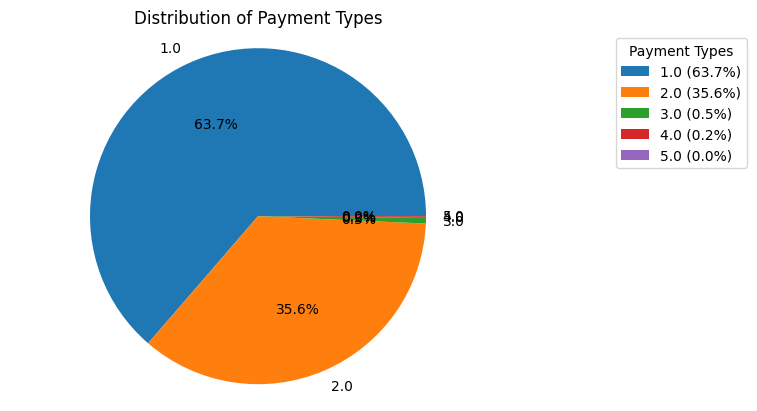

In [127]:
# Example code
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC taxi fare data into a dataframe (replace 'filename.csv' with your actual filename)
#df = pd.read_csv('filename.csv')

# Count the number of occurrences of each payment type
payment_counts = df1['payment_type'].value_counts()

# Create a pie chart showing the distribution of payment types
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Types')

# Add a legend to the chart with percentage values
plt.legend(title='Payment Types', loc='best', bbox_to_anchor=(1, 0, 0.5, 1),
           labels=['{} ({:.1f}%)'.format(i,j*100/sum(payment_counts)) for i,j in payment_counts.items()])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('77.png', dpi=300, bbox_inches='tight')
plt.show()
